In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [3]:
Xs = uniform.rvs(loc=0, scale=50, size=100)
Ys = uniform.rvs(loc=0, scale=50, size=100)

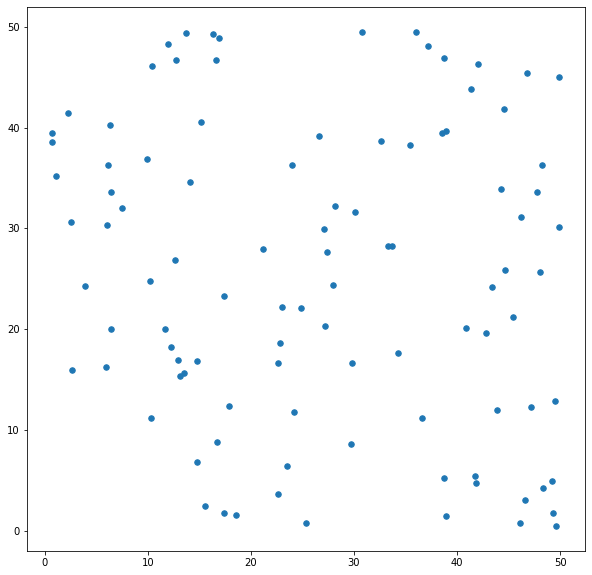

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys, s = 30)

In [8]:
data = np.transpose(np.asarray([Xs, Ys]))

In [12]:
clustering = AgglomerativeClustering(n_clusters = 5).fit(data)

In [14]:
A = clustering.labels_

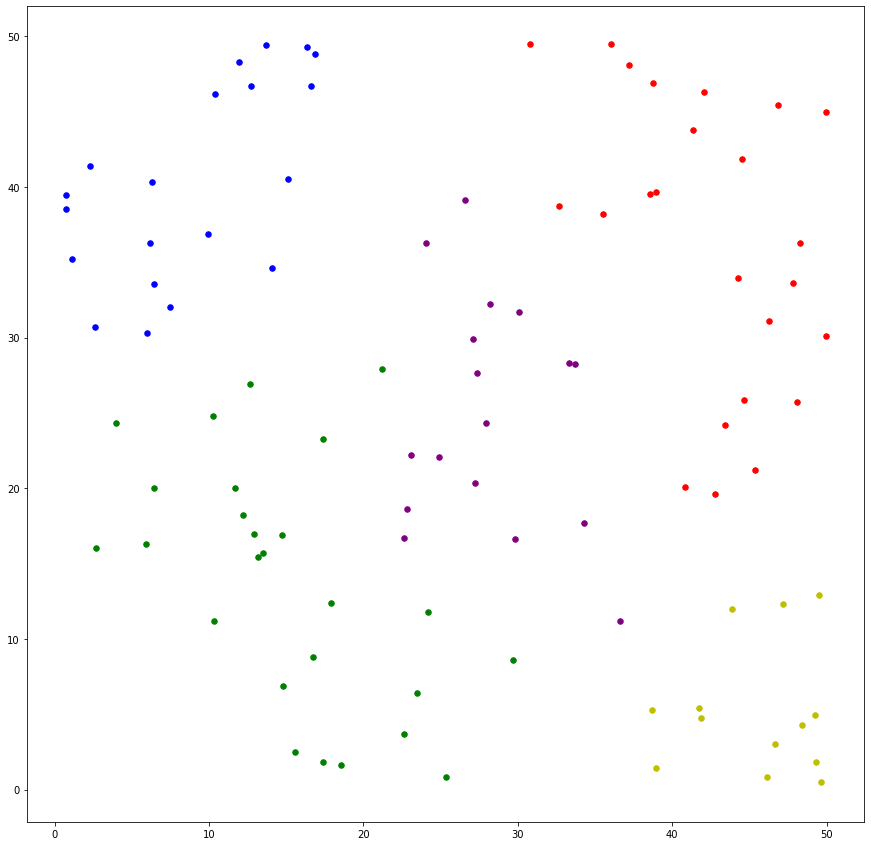

In [17]:
X0 = [Xs[i] for i in range(100) if A[i] == 0] 
X1 = [Xs[i] for i in range(100) if A[i] == 1] 
X2 = [Xs[i] for i in range(100) if A[i] == 2] 
X3 = [Xs[i] for i in range(100) if A[i] == 3] 
X4 = [Xs[i] for i in range(100) if A[i] == 4] 
Y0 = [Ys[i] for i in range(100) if A[i] == 0] 
Y1 = [Ys[i] for i in range(100) if A[i] == 1] 
Y2 = [Ys[i] for i in range(100) if A[i] == 2] 
Y3 = [Ys[i] for i in range(100) if A[i] == 3] 
Y4 = [Ys[i] for i in range(100) if A[i] == 4] 
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'purple')

In [27]:
T= 0.05 / (1 - 0.05 * 1)

In [47]:
import random
random.seed(10)
heads = []
for i in range(100):
    if random.uniform (0,1) <= T: 
        heads.append([Xs[i], Ys[i]])
heads = np.array(heads)
heads[0][1], heads

(23.278767766698323,
 array([[17.37760716, 23.27876777],
        [14.05293225, 34.63380967],
        [27.36014175, 27.65518936],
        [46.23991822, 31.10377925],
        [10.25270511, 24.80879243]]))

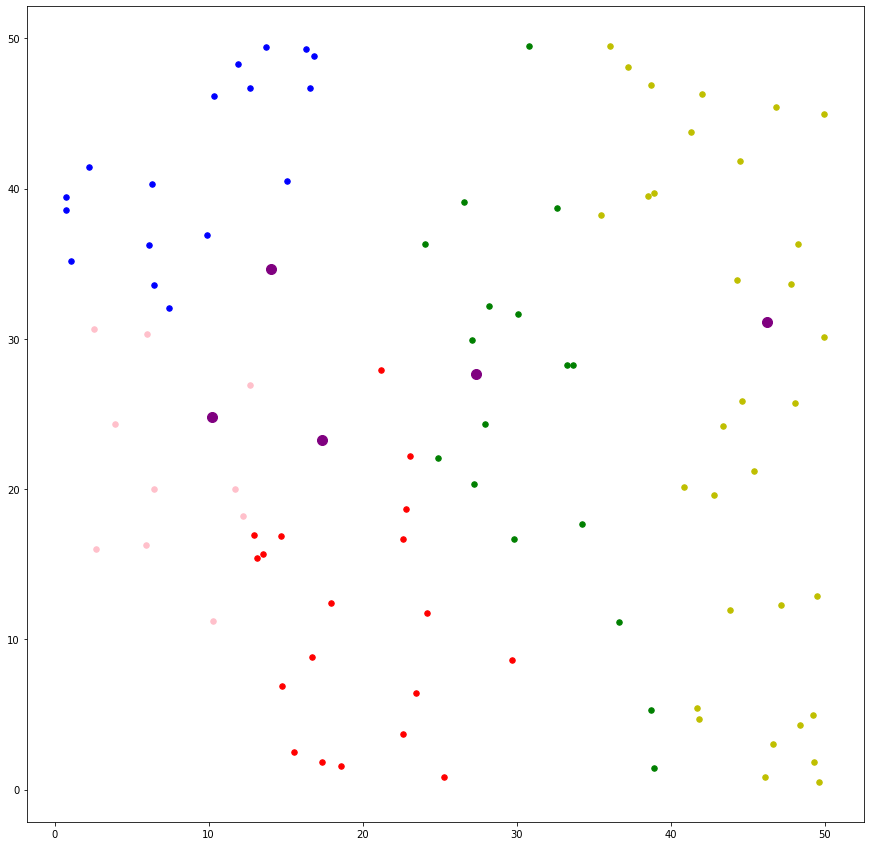

In [52]:
X0 = []
Y0 = []
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
X4 = []
Y4 = []

def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

def choose(x_1, y_1):
    dis0 = distance(x_1, heads[0][0], y_1, heads[0][1])
    dis1 = distance(x_1, heads[1][0], y_1, heads[1][1])
    dis2 = distance(x_1, heads[2][0], y_1, heads[2][1])
    dis3 = distance(x_1, heads[3][0], y_1, heads[3][1])
    dis4 = distance(x_1, heads[4][0], y_1, heads[4][1])
    dis = min(dis0, dis1, dis2, dis3, dis4)
    if dis0 == dis:
        X0.append(x_1)
        Y0.append(y_1)
    if dis1 == dis:
        X1.append(x_1)
        Y1.append(y_1)
    if dis2 == dis:
        X2.append(x_1)
        Y2.append(y_1)
    if dis3 == dis:
        X3.append(x_1)
        Y3.append(y_1)
    if dis4 == dis:
        X4.append(x_1)
        Y4.append(y_1)
        
for i in range(100):
    choose(Xs[i], Ys[i])
    
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')  
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'pink')  
plt.scatter(heads[:, 0], heads[:, 1], s = 100, color = 'purple')